# Get Started
#### Here is a quick start guide to give you an idea of how you can leverage ASTx for your needs. 

In [4]:
from IPython.display import display
import astx

#### First we create an instance of the Module class, and this instance will be the first node of the tree, or the "root element". After that, we declare the variables and literal that will be part of the basic operation that we will parse into an AST.

In [5]:
module = astx.Module()

decl_a = astx.VariableDeclaration(name="a", type_=astx.Int32, value=astx.LiteralInt32(1))
decl_b = astx.VariableDeclaration(name="b", type_=astx.Int32, value=astx.LiteralInt32(2))
decl_c = astx.VariableDeclaration(name="c", type_=astx.Int32, value=astx.LiteralInt32(4))

a = astx.Variable(name="a")
b = astx.Variable(name="b")
c = astx.Variable(name="c")


lit_1 = astx.LiteralInt32(1)

basic_op = lit_1 + b - a * c / a + (b - a / a)

#### After the basic operation is stated, we create an instance of the Function class. As mentioned in the API documentation, each instance of the Function class must have a prototype and a body, so we'll create those first.

#### The body is made of a block that is created and the variables, as well as the basic operation, are appended to it afterwards.

In [6]:
main_proto = astx.FunctionPrototype(
    name="main", args=[], return_type=astx.Int32
)
main_block = astx.Block()
main_block.append(decl_a)
main_block.append(decl_b)
main_block.append(decl_c)
main_block.append(astx.FunctionReturn(basic_op))

main_fn = astx.Function(prototype=main_proto, body=main_block)

module.block.append(main_fn)

#### After this, the module is complete. We can get its AST structure as a dictionary, as well as its PNG representation.

In [7]:
module.get_struct()

{'MODULE[main]': [{'FUNCTION[main]': {'args': [],
    'body': [{'VariableDeclaration[a, Int32] = LiteralInt32(1)': LiteralInt32: temp_0},
     {'VariableDeclaration[b, Int32] = LiteralInt32(2)': LiteralInt32: temp_1},
     {'VariableDeclaration[c, Int32] = LiteralInt32(4)': LiteralInt32: temp_2},
     {'RETURN': {'BINARY[+]': {'lhs': {'BINARY[-]': {'lhs': {'BINARY[+]': {'lhs': {'Literal[Int32]': 1},
            'rhs': {'Variable[b]': Variable: b}}},
          'rhs': {'BINARY[/]': {'lhs': {'BINARY[*]': {'lhs': {'Variable[a]': Variable: a},
              'rhs': {'Variable[c]': Variable: c}}},
            'rhs': {'Variable[a]': Variable: a}}}}},
        'rhs': {'BINARY[-]': {'lhs': {'Variable[b]': Variable: b},
          'rhs': {'BINARY[/]': {'lhs': {'Variable[a]': Variable: a},
            'rhs': {'Variable[a]': Variable: a}}}}}}}}]}}]}

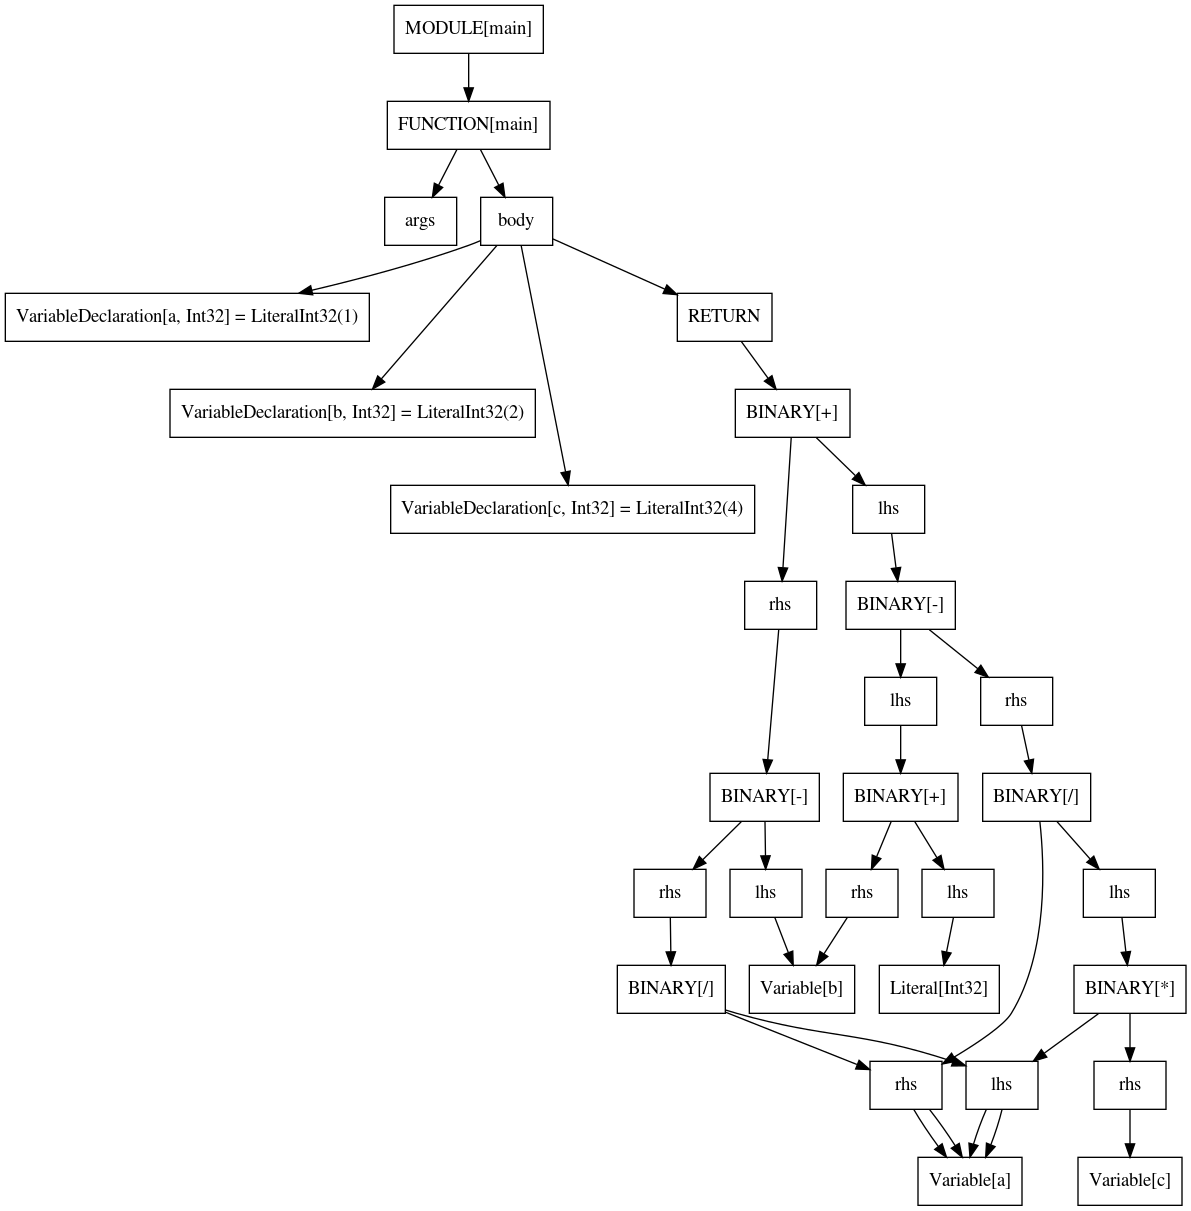

Module

In [8]:
module

#### We can also get the PNG representation of parts of the AST, such as `basic_op` and the variable `a`:

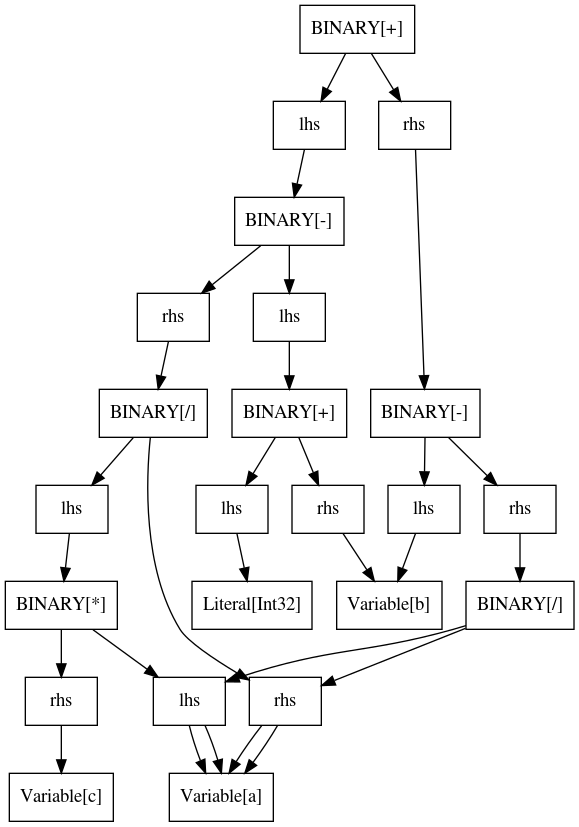

BinaryOp: temp_13

In [9]:
basic_op

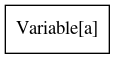

Variable: a

In [10]:
a

## Custom shapes

It is also possible to use custom shapes for the output using the function `viz.visualize`. The Default shape is `box`, but  `diamond`, `ellipse`, and `circle` are also avaiable options. 

In [11]:
from astx import viz

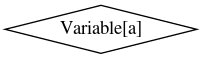

In [12]:
viz.visualize(a.get_struct(), shape="diamond")

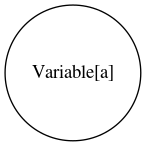

In [13]:
viz.visualize(a.get_struct(), shape="circle")

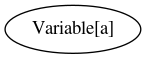

In [14]:
viz.visualize(a.get_struct(), shape="ellipse")